# Define Research Goals


- Infer relationship between sales and three media budgets: TV, Radio, and Newspaper



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn


In [2]:
# We are dropping the first column, So we start it from 1 2 3 4. Because it was not important to us. 


df = pd.read_csv("Advertising.csv",usecols=[1,2,3,4])

In [3]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [4]:
df.head()  #viewing the first five rows of the Data.

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
df.tail()   #Viewing the Last 5 rows of the Data. 

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


In [6]:
df.shape  #Shapes and Dimensions of the Data. 

(200, 4)

# Datatype 


In [7]:
df.info()  # Datatype of the Columns.  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [8]:
import warnings
warnings.filterwarnings("ignore")  

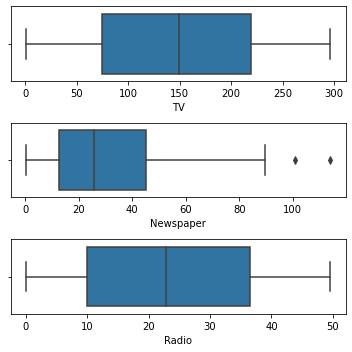

In [9]:
# Outlier Analysis
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(df['TV'], ax = axs[0])
plt2 = sns.boxplot(df['Newspaper'], ax = axs[1])   
plt3 = sns.boxplot(df['Radio'], ax = axs[2])
plt.tight_layout()

There are no considerable outliers present in the data.


# Checking Null Values

In [10]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

# Observations

Our observations are as follows

NaN values do not present in the data set. Because of the Non-Null Count and number of rows in the dataset match.

There are 3 Input Variables and 1 Output Variable (Sales)

The data type of all the input variables is float64. The data type of out variable (Sales) is float64.

Shows that all the input as well as output variables are continuous (quantitative) data types.

None of the columns contain the Null Values

In [11]:
pd.set_option('precision', 2)         # 2 values after precision. 
df.describe()                 # Statistical Summary of the Data.   

,TV,Radio,Newspaper,Sales
count,200.00,200.00,200.00,200.00
mean,147.04,23.26,30.55,14.02
std,85.85,14.85,21.78,5.22
min,0.70,0.00,0.30,1.60
25%,74.38,9.97,12.75,10.38
50%,149.75,22.90,25.75,12.90
75%,218.82,36.52,45.10,17.40
max,296.40,49.60,114.00,27.00


In [12]:
df.describe().T        # Transpose of the Describe function.   

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.04,85.85,0.7,74.38,149.75,218.82,296.4
Radio,200.0,23.26,14.85,0.0,9.97,22.90,36.52,49.6
Newspaper,200.0,30.55,21.78,0.3,12.75,25.75,45.10,114.0
Sales,200.0,14.02,5.22,1.6,10.38,12.90,17.40,27.0


# We can see that the min value of Radio is zero. We need to confirm how many zero values existing in the dataset.



# Analysis of Zero Values in Predictors


In [13]:
(df == 0).sum(axis=0)

TV           0
Radio        1
Newspaper    0
Sales        0
dtype: int64

So, There is only one value which is zero. So, we do not required to handle it. So, Data Cleansing is not required. 

# Response Variable Analysis

In [14]:
df.Sales.value_counts()

9.7     5
15.9    4
11.7    4
12.9    4
20.7    3
       ..
25.5    1
15.6    1
17.6    1
3.2     1
20.8    1
Name: Sales, Length: 121, dtype: int64

We have 121 Unique values. So our response variable is continuous. 

# Relationship - Predictor and Response


In [15]:
# corrmat = df.corr()                        #pariwise correlation of all the columns 
# corrmat

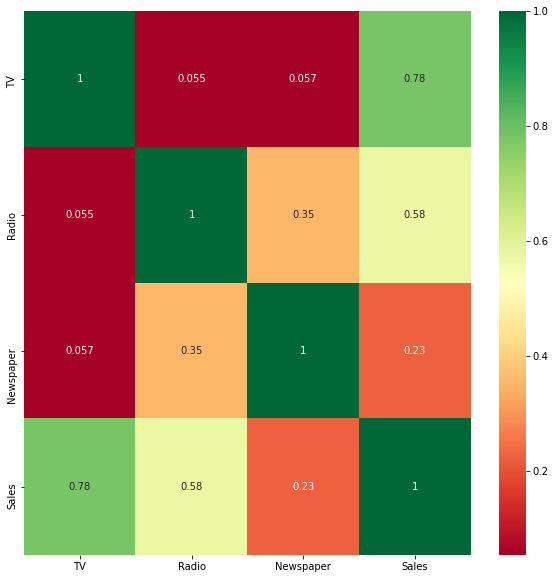

In [16]:
import matplotlib.pyplot as plt
corrmat = df.corr()                        #pariwise correlation of all the columns 
top_corr_features = corrmat.index                     #  Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')
plt.figure(figsize = (10,10))

#heatmap of the data

g = sns.heatmap(df[corrmat.index].corr(),annot = True, cmap="RdYlGn") # annot present values in the blocks. cmap = colormap 

# g = sns.heatmap(df[top_corr_features].corr(),annot = True, cmap="RdYlGn") 

In [17]:
pd.set_option('precision', 2)         # 2 values after precision. 

df.corr()   #Correlation between Variables.

,TV,Radio,Newspaper,Sales
TV,1.00,0.05,0.06,0.78
Radio,0.05,1.00,0.35,0.58
Newspaper,0.06,0.35,1.00,0.23
Sales,0.78,0.58,0.23,1.00


In [18]:
pd.set_option('precision', 2)         # 2 values after precision. 

df.corr().T

,TV,Radio,Newspaper,Sales
TV,1.00,0.05,0.06,0.78
Radio,0.05,1.00,0.35,0.58
Newspaper,0.06,0.35,1.00,0.23
Sales,0.78,0.58,0.23,1.00


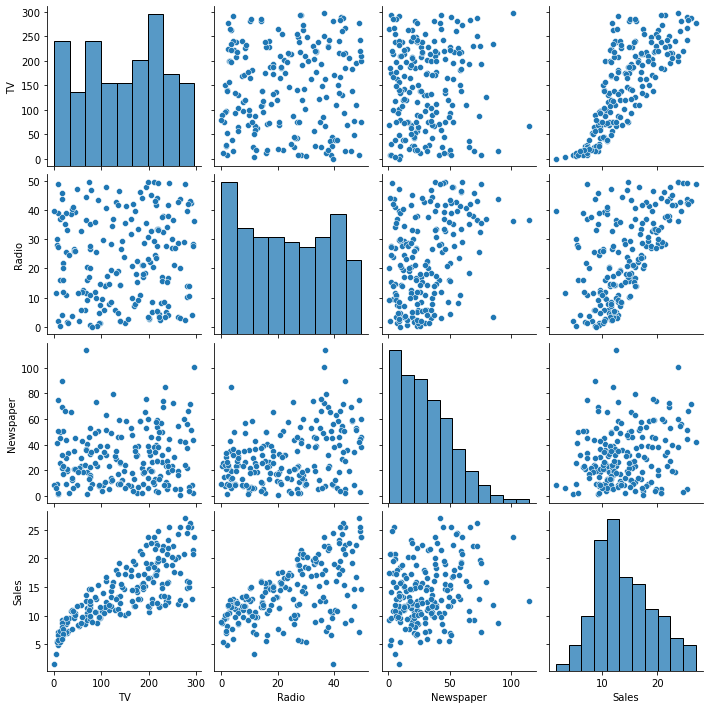

In [19]:
# Pair plot of correlation

import seaborn as sns
sns.pairplot(df)

In [20]:
import warnings
warnings.filterwarnings("ignore")

# Relationship between Sales and TV


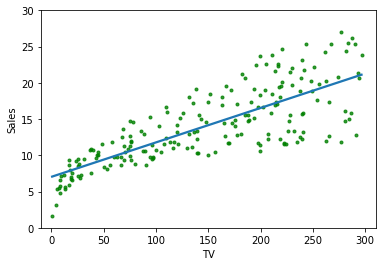

In [21]:
sns.regplot(df.TV, df.Sales, order=1, ci = None,  scatter_kws={'color':'g', 's':9})   # 's':9 denote the size of dots. 
plt.xlim(-10,310)                                                                 
plt.ylim(0,30)   
#plt.ylim(bottom=0)
plt.show() 

# Relationship between Sales and Radio


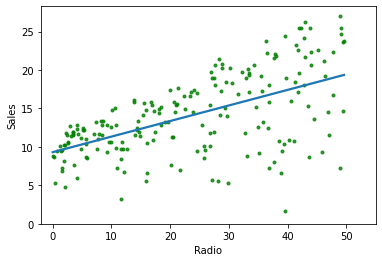

In [22]:
sns.regplot(df.Radio, df.Sales, order=1, ci=None, scatter_kws={'color':'g', 's':9})    
plt.xlim(-2,55)
plt.ylim(bottom=0)   
#plt.ylim(0,30)      
plt.show() 

# Relationship between Sales and Newspaper


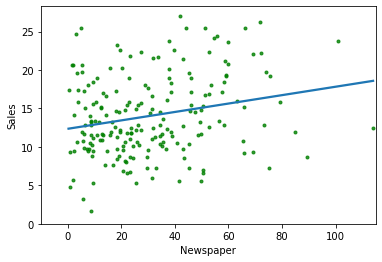

In [23]:
sns.regplot(df.Newspaper, df.Sales, order=1, ci=None, scatter_kws={'color':'g', 's':9}) 
plt.xlim(-10,115)  
#plt.ylim(0,30)      
plt.ylim(bottom=0)
plt.show() 

We need the Scaling the Data because the values of the TV are more greater than the Radio and Newspaper.  

# Data Normalization


# Scaling the TV Data.


In [24]:
from sklearn.preprocessing import scale                # we can also use StandardScalar. 
X = scale(df.TV, with_mean=True, with_std=False).reshape(-1,1)
y = df.Sales     

In [25]:
X

array([[  83.0575],
       [-102.5425],
       [-129.8425],
       [   4.4575],
       [  33.7575],
       [-138.3425],
       [ -89.5425],
       [ -26.8425],
       [-138.4425],
       [  52.7575],
       [ -80.9425],
       [  67.6575],
       [-123.2425],
       [ -49.5425],
       [  57.0575],
       [  48.3575],
       [ -79.2425],
       [ 134.3575],
       [ -77.8425],
       [   0.2575],
       [  71.3575],
       [  90.3575],
       [-133.8425],
       [  81.2575],
       [ -84.7425],
       [ 115.8575],
       [  -4.1425],
       [  93.0575],
       [ 101.7575],
       [ -76.4425],
       [ 145.8575],
       [ -34.1425],
       [ -49.8425],
       [ 118.5575],
       [ -51.3425],
       [ 143.6575],
       [ 119.8575],
       [ -72.3425],
       [-103.9425],
       [  80.9575],
       [  55.4575],
       [  29.9575],
       [ 146.5575],
       [  59.8575],
       [-121.9425],
       [  28.0575],
       [ -57.3425],
       [  92.8575],
       [  80.1575],
       [ -80.1425],


In [26]:
df.describe().T        # Transpose of the Describe function.   

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.04,85.85,0.7,74.38,149.75,218.82,296.4
Radio,200.0,23.26,14.85,0.0,9.97,22.90,36.52,49.6
Newspaper,200.0,30.55,21.78,0.3,12.75,25.75,45.10,114.0
Sales,200.0,14.02,5.22,1.6,10.38,12.90,17.40,27.0


In [27]:
X[0:5]      #printing first five rows. 

array([[  83.0575],
       [-102.5425],
       [-129.8425],
       [   4.4575],
       [  33.7575]])

In [28]:
X.mean()   #very near to zero. 

1.0089706847793422e-14

In [29]:
X.std()        # we give false value. So it is same as it is. 

85.63933175679269

# Linear Regression for Scaled Data using Sklearn

In [30]:
import sklearn.linear_model as skl_lm
from sklearn.linear_model import LinearRegression

regr = skl_lm.LinearRegression()

regr.fit(X,y)
LinearRegression()

regr.intercept_ 

14.0225

In [31]:
regr.coef_

array([0.04753664])

In [32]:
min_rss = np.sum((regr.intercept_+regr.coef_*X - y.values.reshape(-1,1))**2)

In [33]:
min_rss

2102.5305831313512

In [34]:
from sklearn.metrics import mean_squared_error, r2_score
Sales_pred = regr.predict(X)                       # Value of Target variable when we predict it with the Independent variable. 
r2_score(y, Sales_pred) 

0.611875050850071

In [35]:
mean_squared_error(y, Sales_pred)                        # Know about the error between actual and predicted. 

10.512652915656757

# Linaer Regression for Unscaled Data using Sklearn

In [36]:
regr = skl_lm.LinearRegression()
X = df.TV.values.reshape(-1,1)
y = df.Sales
regr.fit(X,y)
regr.score(X,y)

0.611875050850071

In [37]:
regr.intercept_

7.032593549127693

In [38]:
regr.coef_

array([0.04753664])

# Residual Sum of Squares

In [39]:
min_rss = np.sum((regr.intercept_+regr.coef_*X - y.values.reshape(-1,1))**2)

In [40]:
min_rss

2102.5305831313512

# MSE


In [41]:
mse = min_rss/len(y)                                   #  min_rss / degree of freedom   
mse                                     #value should be 0 to infinite but not negative. 

10.512652915656757

# R-Sq using Sklearn


In [42]:

from sklearn.metrics import mean_squared_error, r2_score
Sales_pred = regr.predict(X)                       # Value of Target variable when we predict it with the Independent variable. 
r2_score(y, Sales_pred) 


0.611875050850071

# MSE using SKLearn



In [43]:
mean_squared_error(y, Sales_pred)                        # Know about the error between actual and predicted. 

10.512652915656757

# Regression Summary using Statsmodel

In [44]:
#  OLS = ordinary least square method. 

import statsmodels.api as sm
X2 = sm.add_constant(X)
est = sm.OLS(y,X2) 
est2=est.fit()
est2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Sat, 22 May 2021   Prob (F-statistic):           1.47e-42
Time:                        15:24:44   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.000       6.130       7.935
x1             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
import statsmodels.formula.api as smf
est = smf.ols('Sales ~ TV', df).fit()
est.summary()   # est.summary().tables[0/1/2]   


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Sat, 22 May 2021   Prob (F-statistic):           1.47e-42
Time:                        15:24:44   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
# Regression RSS and MSE
est.params                         


Intercept    7.03
TV           0.05
dtype: float64

In [47]:
# RSS
((df.Sales - (est.params[0] + est.params[1] * df.TV))** 2).sum()          # **2 means squaring. 


2102.5305831313512

In [48]:
# MSE
((df.Sales - (est.params[0] + est.params[1]*df.TV))** 2).sum()/len(df.Sales)


10.512652915656757

In [49]:
# Linear Regression Sales and Radio

est = smf.ols('Sales ~ Radio', df).fit()



In [50]:
print(est.summary().tables[1])


                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.3116      0.563     16.542      0.000       8.202      10.422
Radio          0.2025      0.020      9.921      0.000       0.162       0.243


The value of Beta_1  is less than 0.05 then we can say there is a relationship. If we spend 1000 dollers in Newspaper then we got 202.5+9.3116 in Sales. 

In [51]:
# Linear Regression Sales and Newspaper

est = smf.ols('Sales ~ Newspaper', df).fit()
print(est.summary().tables[1])


                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.3514      0.621     19.876      0.000      11.126      13.577
Newspaper      0.0547      0.017      3.300      0.001       0.022       0.087


# Multiple Linear Regression


In [52]:
est = smf.ols('Sales ~ TV + Radio + Newspaper', df).fit()
est.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sat, 22 May 2021   Prob (F-statistic):           1.58e-96
Time:                        15:24:44   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Quantify the extent to which model fits the data or measure of lack of fit using 4 Methods

Multiple R   <br>
 R Statistics<br>
Adjusted  Statistics<br>
Residual Standard Error<br>

# Multiple Linear Regression

In [53]:
from sklearn.model_selection import train_test_split

X = df.drop(['Sales'],axis=1)
y = df['Sales']

X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=1/3, random_state=21)


In [54]:
import sklearn.linear_model as skl_lm
regr = skl_lm.LinearRegression()
regr.fit(X_train,y_train)

round( (regr.score(X_test,y_test)*100) , 2   )

86.94

In [55]:

round( (regr.score(X_train,y_train)*100) , 2   ) 

90.89

In [56]:
regr.score(X_train,y_train)

0.9088738604922098

In [57]:
regr.score(X_test,y_test)

0.8693952473097504

In [58]:
y_pred = regr.predict(X_test)
y_pred

array([10.03767108, 12.28117712, 23.19399211, 17.97839271, 15.18140567,
       12.15066141, 20.88372702,  4.36114944,  7.80337812, 24.02767203,
       14.4416753 , 21.76194495, 18.19882566,  9.60520673, 15.76551128,
       16.49387159, 19.23393068, 19.0892677 , 22.78931531,  8.89308959,
        3.51240329, 12.01454414, 16.35448207, 23.69373971,  8.58488411,
        4.40155225, 16.96615138,  6.49540445, 12.6543484 , 15.0531345 ,
       14.34394701,  8.581236  , 23.52979333,  6.48990309, 17.3842462 ,
        5.66886142, 12.13241223, 16.9671632 , 10.11733824, 20.49487456,
       20.10988038, 21.38875251, 15.8468134 , 18.47613757,  6.18040859,
       14.84480219, 13.1409745 ,  5.40551476, 15.31391532, 14.78822195,
        9.36774012, 18.05076321, 17.84578578, 10.47778848, 16.12790101,
       16.62780254, 11.3965583 , 13.74140906, 16.43699357, 11.15665697,
       14.93053021,  9.08416763, 13.12866804, 18.4379252 , 12.38828254,
       13.63124212, 12.32478639])

In [59]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8693952473097504

In [60]:
regr.predict([[20,334.34,34.3443]])

array([72.29430068])

In [61]:
regr.predict([[20,30,230]])

array([8.11634899])

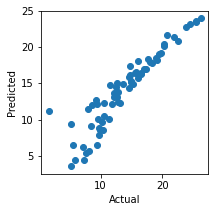

In [62]:

plt.figure(figsize=(3,3) ) 
plt.scatter(y_test, y_pred) 
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()


In [63]:
type(y_pred)

numpy.ndarray

In [64]:
y_pred 

array([10.03767108, 12.28117712, 23.19399211, 17.97839271, 15.18140567,
       12.15066141, 20.88372702,  4.36114944,  7.80337812, 24.02767203,
       14.4416753 , 21.76194495, 18.19882566,  9.60520673, 15.76551128,
       16.49387159, 19.23393068, 19.0892677 , 22.78931531,  8.89308959,
        3.51240329, 12.01454414, 16.35448207, 23.69373971,  8.58488411,
        4.40155225, 16.96615138,  6.49540445, 12.6543484 , 15.0531345 ,
       14.34394701,  8.581236  , 23.52979333,  6.48990309, 17.3842462 ,
        5.66886142, 12.13241223, 16.9671632 , 10.11733824, 20.49487456,
       20.10988038, 21.38875251, 15.8468134 , 18.47613757,  6.18040859,
       14.84480219, 13.1409745 ,  5.40551476, 15.31391532, 14.78822195,
        9.36774012, 18.05076321, 17.84578578, 10.47778848, 16.12790101,
       16.62780254, 11.3965583 , 13.74140906, 16.43699357, 11.15665697,
       14.93053021,  9.08416763, 13.12866804, 18.4379252 , 12.38828254,
       13.63124212, 12.32478639])

In [65]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Difference': y_test-y_pred})
df1.head(10)


,Actual,Predicted,Difference
144,11.4,10.04,1.36
9,10.6,12.28,-1.68
17,24.4,23.19,1.21
20,18.0,17.98,0.02
45,14.9,15.18,-0.28
6,11.8,12.15,-0.35
52,22.6,20.88,1.72
91,7.3,4.36,2.94
129,9.7,7.80,1.90
183,26.2,24.03,2.17


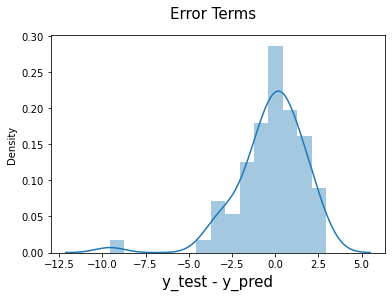

In [66]:
fig = plt.figure()
res = (y_test - y_pred)
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('y_test - y_pred', fontsize = 15)                # X-label
plt.show()

In [67]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.00,200.00,200.00,200.00
mean,147.04,23.26,30.55,14.02
std,85.85,14.85,21.78,5.22
min,0.70,0.00,0.30,1.60
25%,74.38,9.97,12.75,10.38
50%,149.75,22.90,25.75,12.90
75%,218.82,36.52,45.10,17.40
max,296.40,49.60,114.00,27.00


In [68]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.04,85.85,0.7,74.38,149.75,218.82,296.4
Radio,200.0,23.26,14.85,0.0,9.97,22.90,36.52,49.6
Newspaper,200.0,30.55,21.78,0.3,12.75,25.75,45.10,114.0
Sales,200.0,14.02,5.22,1.6,10.38,12.90,17.40,27.0


In [69]:
import joblib
joblib.dump(regr, "marketing_model.pkl")    

['marketing_model.pkl']

In [70]:
import pandas_profiling as pp
profile = pp.ProfileReport(df)
profile.to_file("output.html")
